In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import scipy.stats as st
%matplotlib inline

In [70]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [71]:
# Load the dataset
df = pd.read_csv("final_dataset.csv")
columns_drop=['SEQN']
df=df.drop(columns=columns_drop, axis=1)
# Let us replace 1 and 2 in the gender column with 0 and 1
df['Gender'].replace([1, 2], [0, 1], inplace=True)
#df=df.fillna(0)
df

,Gender,Age,Marital_status,Pregnant,current_drinker,former_drinker_x,current_smoker,former_drinker_y,Aspirin_use,High_Blood_pressure,High_Cholestrol,Chest_pain,stomach problem,Chest Cold,Pneu_flu_ear infection,HIV,Health_cond,Diabetes,Difficulty Hearing,Difficulty Seeing,Drug Addict,Hepatitis_B,Hepatitis_C,hospitalized,days_hospitalised,Weak Kidney,Dialysis,Kidney Stone,Pesticide_used,asthma,asthma_current,anemia,overweight,blood_transfusion,arthritis,gout,congestive heart failure,coronary heart disease,heart attack,stroke,emphysema,thyroid,chronic bronchitis,current_chronic bronchitis,liver problem,COPD,jaundice,cancer,kidney_cancer,Farmer,smoked_in_pregnancy,Prescribed_medicine,Env_Subsamp_B_wts_x,"2,4-D","3,5,6-trichloropyridinol",4-fluoro-3-phenoxy-benzoic acid,3-phenoxybenzoic acid,Oxypyrimidine,para-Nitrophenol,Dichlorovnl-dimeth prop carboacid,Malathion diacid,Env_Subsamp_B_wts_y,Dimethylphosphate,Diethylphosphate,Dimethylthiophosphate,Diethylthiophosphate,Dimethyldithiophosphate,Diethyldithiophosphate,surplus specimen_B_2y_wts,Imidacloprid,Acetamiprid,Clothianidin,Thiacloprid,5-Hydroxyimidacloprid,N-Desmethylacetamiprid,surplus specimen_GLYP_2y_wts,Glyphosate,UACR
0,1,42,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1,44132.048218,0.21,1.50,0.07,5.60,0.95,1.10,2.00,0.35,44132.048218,1.640,8.230,0.302,0.485,0.105,0.07,59113.041721,0.28,0.21,0.14,0.02,0.280,0.14,59113.041721,0.342,0
1,0,4,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0,46173.307234,0.32,0.74,0.07,0.23,0.07,5.20,0.42,0.35,46173.307234,0.686,7.560,0.070,0.070,0.070,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0
2,1,15,0,0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,NaN,0.0,0.0,0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,0,83710.974098,0.64,1.30,0.07,9.70,0.23,1.10,9.20,0.35,83710.974098,1.040,2.690,0.669,0.266,0.205,0.07,105572.288671,0.28,0.21,0.14,0.02,0.625,0.14,105572.288671,0.609,0
3,1,4,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0,11273.997898,0.35,0.81,0.07,0.39,0.07,0.61,0.42,0.35,11273.997898,3.670,4.460,4.750,2.620,0.271,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0
4,0,3,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,1,11184.295239,0.22,0.20,0.07,0.36,0.07,0.22,0.42,0.35,11184.295239,0.422,0.618,0.366,0.070,0.070,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6216,0,53,1,0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,67721.994612,0.11,0.19,0.42,0.20,0.07,0.31,0.42,0.35,67721.994612,9.250,0.416,19.300,0.167,4.560,0.07,74510.404189,0.28,0.21,0.14,0.02,0.280,NaN,74510.404189,0.269,0
6217,0,53,1,0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,67721.994612,0.11,0.19,0.42,0.20,0.07,0.31,0.42,0.35,67721.994612,9.250,0.416,19.300,0.167,4.560,0.07,74510.404189,0.28,0.21,0.14,0.02,0.280,NaN,74510.404189,0.269,0

In [72]:
health_condition = pd.get_dummies(df['Health_cond'], drop_first=True,dtype=int)
print(health_condition.head())
df.drop(['Health_cond'], axis=1, inplace=True)
df = pd.concat([df, health_condition], axis =1)
df = df.rename(columns={1:'HC1', 2: 'HC2', 3: 'HC3', 4:'HC4',5:'HC5'}) # 4 binary columns enough to describe 5 categories
# checking for missing values, there are many rows with missing values
df.isna().sum()


   2.0  3.0  4.0  5.0
0    0    0    1    0
1    0    0    0    0
2    0    1    0    0
3    0    0    0    0
4    0    0    0    0


Gender                0
Age                   0
Marital_status        0
Pregnant              0
current_drinker    1568
                   ... 
UACR                  0
HC2                   0
HC3                   0
HC4                   0
HC5                   0
Length: 81, dtype: int64

<Axes: xlabel='UACR'>

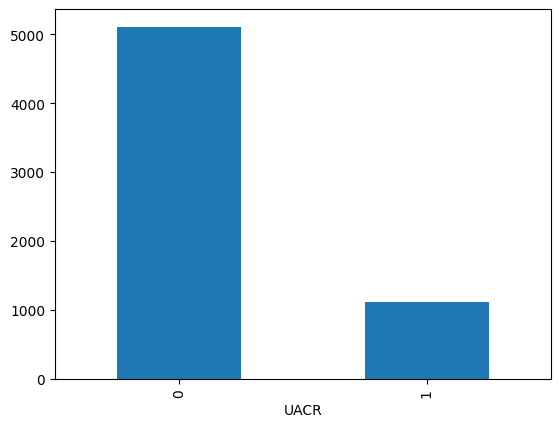

In [73]:
# It is an imbalanced dataset
df['UACR'].value_counts().plot(kind='bar')

In [74]:
# Split the data into features (X) and target (y)
X = df.drop("UACR", axis=1)
y = df["UACR"]


##### Test_train split

In [75]:
def test_trainsplit(X,y):
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Standardize the features

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    #y_train_series=pd.Series(y_train)
    #y_train_series.value_counts()
    return X_train, X_test, y_train, y_test 

##### Classifiers


In [76]:
def models(X_train,y_train,model):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    if model=='Logistic Regression':
        clf=LogisticRegression()
    elif model== 'DT':
        clf=DecisionTreeClassifier()
    elif model== 'SVM':
        clf=SVC(kernel='linear',C=1)
    elif model== 'Random Forest':
        clf=RandomForestClassifier()
    else:
        clf=KNeighborsClassifier(n_neighbors=5)
        
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    return y_pred
            
    

##### Evaluation Metrics

In [77]:
#Evaluation metrics
def metrics_calculation(y_actual, y_predicted,model,imp_method,samp_method,dim_reduc,plot_roc_curve=True):
    from sklearn import metrics
    #Classification report
    #class_report=metrics.classification_report(y_actual,y_predicted)
    #print("Classification report:\n",class_report)
    
    #Confusion Matrix
    conf_mat = metrics.confusion_matrix(y_actual,y_predicted,labels=None)
    #print("Confusion Matrix:\n",conf_mat)
    
    #Confusion Matrix Display
    #conf_display=metrics.ConfusionMatrixDisplay(conf_mat)
    #conf_display.plot()
    #plt.show()
    
    #Accuracy
    accuracy =metrics.accuracy_score(y_actual, y_predicted)
    #print("Accuracy:",accuracy)
    
    #precision
    precision=metrics.precision_score(y_actual, y_predicted)
    #print("Precision:",precision)
    
    #Recall
    recall=metrics.recall_score(y_actual, y_predicted)
    #print("Recall:",recall)

    #sensitivity
    sensitivity = conf_mat[1, 1] / (conf_mat[1,1] + conf_mat[1,0])
    #print("Sensitivity:",sensitivity)
    
    #specificity
    specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
    #print("Specificity:",specificity)
    
    #f1-score
    f1_score = metrics.f1_score(y_actual,y_predicted)
    #print("F1-Score:",f1_score)
    
    #Cohen's Kappa score
    Kappa_score= metrics.cohen_kappa_score(y_actual,y_predicted)
    #print("Cohen Kappa Score:",Kappa_score)
    
    #G-measure
    g_measure=2*(precision*recall)/(precision+recall)
    #print("G_measure:",g_measure)
    
    #Informedness/Youdens statistic
    informedness=sensitivity+specificity-1
    #print("Informedness/Youdens statistic:",informedness)
    
    #Positive predictive Value
    ppv= conf_mat[1,1] / (conf_mat[1,1] + conf_mat[0,1])
    #print("PPV:",ppv)
    
     #Negative predictive Value
    npv= conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[1,0])
    #print("NPV:",npv)
    
    #Markedness
    marked=ppv+npv-1
    #print("Markedness:",marked)
    
    # Matthews Correlation Coefficient
    mcc=((conf_mat[0, 0] * conf_mat[1, 1]) - (conf_mat[0, 1] * conf_mat[1, 0]))/np.sqrt((conf_mat[0, 0] + conf_mat[0, 1])
        * (conf_mat[0, 0] + conf_mat[1, 0]) * (conf_mat[1, 1] + conf_mat[1, 0]) * (conf_mat[1, 1] + conf_mat[0, 1]))
    #print("Matthews Correlation Coefficient",mcc)
    
    #ROC-AUC Score
    roc_auc=metrics.roc_auc_score(y_actual,y_predicted)
    #print("ROC-AUC Score:",roc_auc)
    
    #ROC_Curve
    fpr,tpr,thresholds =metrics.roc_curve(y_actual,y_predicted)
    '''if plot_roc_curve:
        print('Classifier:',model)
        # Plot ROC curve
        plt.figure(figsize=(8, 8))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()
      '''  
    results={'Model':model,"Imputation Method":imp_method,'Oversampling Method': samp_method,'Dimension reduction':dim_reduc,"Accuracy":accuracy,"Precision":precision,"Recall":recall,"F1-Score":f1_score,"ROC-AUC Score":roc_auc}
    #print(results)
    return results
  

##### Imputation Methods

In [78]:
#KNN
from sklearn.impute import KNNImputer
def impute_missing_values_knn(df, n_neighbors=3, weights='uniform', metric='nan_euclidean'):
    imputer = KNNImputer(n_neighbors=n_neighbors, weights=weights, metric=metric)
    X_imputed = imputer.fit_transform(df)
    missing_count = np.sum(np.isnan(X_imputed).flatten())
    X_columns = df.iloc[:, :]  # Select all columns
    df_knn = pd.DataFrame(X_imputed, columns=X_columns.columns)
    return df_knn


In [79]:
#median
def fill_missing_with_median(df3):
    columns_with_missing_values = df.columns[df.isnull().any()].tolist()
    df_median = df3.copy()
    df_median[columns_with_missing_values] = df3[columns_with_missing_values].fillna(df3.median())
    return df_median

In [80]:
def diff_imputation_methods(df,imp_method):
    if imp_method=='constant':
        df_impute=df.fillna(37)
    elif imp_method=='knn':
        df_impute = impute_missing_values_knn(df)
        #print(X_selected)
    elif imp_method== 'median':
        # usage of select_k_best
        df_impute = fill_missing_with_median(df)
    elif imp_method== 'MICE':
        df_impute=impute_missing_data(df)
    return df_impute
            
    

In [81]:
#MICE
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

def impute_missing_data(df, estimator_max_depth=8, random_state=11, skip_complete=True):
    estimator = RandomForestRegressor(max_depth=estimator_max_depth)
    mice = IterativeImputer(estimator=estimator, random_state=random_state, skip_complete=skip_complete)
    #print(mice)
    impdata = mice.fit_transform(df)
    print(impdata)
    impdata = pd.DataFrame(impdata, columns=df.columns)
    print(impdata.shape)
    total_missing = impdata.isnull().sum().sum()
    return impdata

##### Evaluating Imputation techniques

In [82]:
classifiers= ['Logistic Regression','SVM','DT','Random Forest','KNN']
imputation_methods = ['constant','knn', 'median']

#Imputation methods
eval_metrics=[]
for model in classifiers:
    for imp_method in imputation_methods:
        # Apply imputation methods
        X_imputed = diff_imputation_methods(X, imp_method)
        X_train, X_test, y_train, y_test=test_trainsplit(X_imputed,y)      
        y_pred=models(X_train, y_train,model)
        metrics=metrics_calculation(y_test,y_pred,model,imp_method,None,None)
        #eval_metrics[method]=metrics
        eval_metrics.append(metrics)
evaluation_df = pd.DataFrame(eval_metrics)
evaluation_df      


,Model,Imputation Method,Oversampling Method,Dimension reduction,Accuracy,Precision,Recall,F1-Score,ROC-AUC Score
0,Logistic Regression,constant,None,None,0.814458,0.538462,0.148305,0.232558,0.559286
1,Logistic Regression,knn,None,None,0.820884,0.600000,0.165254,0.259136,0.569743
2,Logistic Regression,median,None,None,0.820080,0.596774,0.156780,0.248322,0.566001
3,SVM,constant,None,None,0.814458,0.631579,0.050847,0.094118,0.521955
4,SVM,knn,None,None,0.814458,0.631579,0.050847,0.094118,0.521955
5,SVM,median,None,None,0.814458,0.631579,0.050847,0.094118,0.521955
6,DT,constant,None,None,0.920482,0.801762,0.771186,0.786177,0.863294
7,DT,knn,None,None,0.916466,0.789474,0.762712,0.775862,0.857570
8,DT,median,None,None,0.913253,0.768908,0.775424,0.772152,0.860457
9,Random Forest,constant,None,None,0.946185,0.988439,0.724576,0.836186,0.861297


#### Oversampling Techniques

In [83]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN, SMOTENC

def oversample_data(X, y, method='smote', sampling_strategy='auto', random_state=42):
    if method == 'smote':
        oversampler = SMOTE(sampling_strategy=sampling_strategy, random_state=random_state)
    elif method == 'borderline':
        oversampler = BorderlineSMOTE(sampling_strategy=sampling_strategy, random_state=random_state)
    elif method == 'adasyn':
        oversampler = ADASYN(sampling_strategy=sampling_strategy, random_state=random_state)
    elif method == 'smotenc':
        categorical_features = [True] * X.shape[1]
        categorical_features[1] = False  # Age is not categorical
        oversampler = SMOTENC(sampling_strategy=sampling_strategy, categorical_features=categorical_features, random_state=random_state)
    else:
        raise ValueError("Invalid oversampling method")

    X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
    return X_resampled, y_resampled

##### Evaluating Oversampling Methods

In [84]:
classifiers= ['Logistic Regression','SVM','DT','Random Forest','KNN']
oversampling_methods = ['smote', 'borderline', 'adasyn','smotenc']

#Oversampling models
eval_metrics=[]
for model in classifiers:
    for samp_method in oversampling_methods:
        X_imputed = impute_missing_values_knn(X)
        X_train, X_test, y_train, y_test=test_trainsplit(X_imputed,y)  
        # Apply oversampling using the oversample_data function
        X_resampled, y_resampled = oversample_data(X_train, y_train, method=samp_method)
        y_pred=models(X_resampled, y_resampled,model)
        metrics=metrics_calculation(y_test,y_pred,model,'knn',samp_method,None)
        #eval_metrics[method]=metrics
        eval_metrics.append(metrics)
evaluation_df = pd.DataFrame(eval_metrics)
evaluation_df      


,Model,Imputation Method,Oversampling Method,Dimension reduction,Accuracy,Precision,Recall,F1-Score,ROC-AUC Score
0,Logistic Regression,knn,smote,None,0.714056,0.359155,0.648305,0.462236,0.688870
1,Logistic Regression,knn,borderline,None,0.643373,0.285124,0.584746,0.383333,0.620916
2,Logistic Regression,knn,adasyn,None,0.627309,0.277344,0.601695,0.379679,0.617498
3,Logistic Regression,knn,smotenc,None,0.724498,0.369830,0.644068,0.469861,0.693689
4,SVM,knn,smote,None,0.727711,0.364829,0.588983,0.450567,0.674571
5,SVM,knn,borderline,None,0.647390,0.290722,0.597458,0.391123,0.628263
6,SVM,knn,adasyn,None,0.627309,0.282443,0.627119,0.389474,0.627236
7,SVM,knn,smotenc,None,0.704418,0.352679,0.669492,0.461988,0.691039
8,DT,knn,smote,None,0.922892,0.786885,0.813559,0.800000,0.881012
9,DT,knn,borderline,None,0.912450,0.765690,0.775424,0.770526,0.859962


##### Dimension Reduction techniques

In [85]:
import statsmodels.api as sm
# takes input - X(feature vector), y(target variable)
# prints significant columns with(p-value<0.05)
# outputs new dataframe with only significant features
# remove print statements when not needed
def get_p_values_significant_features(X,y):
    X = sm.add_constant(X)
    ols_model = sm.OLS(y, X).fit()
    p_features = {}
    for i in X.columns.tolist():
        p_features[f'{i}'] = ols_model.pvalues[i]

    data_pvalue= pd.DataFrame(p_features.items(), columns=['Feature_name', 'p-Value']).sort_values(by = 'p-Value').reset_index(drop=True)
    #print('*'*50
    
    
    
    #print('significant features')
    #print('*'*50)
    #print(data_pvalue[data_pvalue['p-Value']<0.05])
    significant_features = data_pvalue[data_pvalue['p-Value']<0.05]['Feature_name'].tolist()
    #print("significant_features:",X[significant_features].shape)
    
    return X[significant_features]



In [86]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# takes input - X(feature vector), y(target variable), no_of_features(to be selected)
# prints selected columns
# outputs new dataframe with selected features
# remove print statements when not needed
def select_k_best(X,y,no_of_features):
    k_selector = SelectKBest(mutual_info_classif, k=no_of_features)
    X_new = k_selector.fit_transform(X, y)
    chosen_indices = k_selector.get_support(indices=True)
    column_names = X.columns
    #print('*'*50)
    #print('selected features using mutual_info_classif')
    #print('*'*50)
    selected_column_names = column_names[chosen_indices]
    #print(selected_column_names)
    #print("SelKbest:",selected_column_names.shape)
    return X[selected_column_names]


In [87]:
#PCA
def pca_dim_reduction(X):
    from sklearn.decomposition import PCA
    # Apply PCA
    #n_components=0.95
    pca = PCA(0.95)
    X_pca = pca.fit_transform(X)
    #print(X_pca.shape)
    return X_pca

In [88]:
def dimension_reduction(X,y,dim_red):
    if dim_red=='p-significant feature':
        X_selected = get_p_values_significant_features(X,y)
        #print(X_selected)
    elif dim_red== 'SelectKBest':
        # usage of select_k_best
        X_selected = select_k_best(X, y, 40)
    elif dim_red== 'pca':
        X_selected=pca_dim_reduction(X)
    return X_selected
            
    

In [89]:
dim_reduction= ['p-significant feature','SelectKBest']
classifiers= ['Logistic Regression','DT','Random Forest','KNN']
#classifiers=['SVM']
oversampling_methods = ['smote', 'borderline', 'adasyn','smotenc']

eval_metrics=[]
for model in classifiers:
    X_imputed = impute_missing_values_knn(X)
    for dim in dim_reduction:
        X_selected=dimension_reduction(X_imputed,y,dim)
        #print(X_selected)
        X_train, X_test, y_train, y_test=testtrain_split(X_selected,y)
       #print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
        for samp_method in oversampling_methods:
            #X_train, X_test, y_train, y_test=test_trainsplit(X_imputed,y)  
            # Apply oversampling using the oversample_data function
            X_resampled, y_resampled = oversample_data(X_train, y_train, method=samp_method)
            #print(X_resampled.shape, y_resampled.shape)
            y_pred=models(X_resampled, y_resampled,model)
            #print(Y_pred.shape)
            metrics=metrics_calculation(y_test,y_pred,model,'knn',samp_method,dim)
            #eval_metrics[method]=metrics
            eval_metrics.append(metrics)
evaluation_df = pd.DataFrame(eval_metrics)
evaluation_df      



,Model,Imputation Method,Oversampling Method,Dimension reduction,Accuracy,Precision,Recall,F1-Score,ROC-AUC Score
0,Logistic Regression,knn,smote,p-significant feature,0.481124,0.231675,0.750000,0.354000,0.584118
1,Logistic Regression,knn,borderline,p-significant feature,0.580723,0.270833,0.716102,0.393023,0.632580
2,Logistic Regression,knn,adasyn,p-significant feature,0.665863,0.134146,0.139831,0.136929,0.464365
3,Logistic Regression,knn,smotenc,p-significant feature,0.501205,0.234483,0.720339,0.353798,0.585145
4,Logistic Regression,knn,smote,SelectKBest,0.606426,0.277193,0.669492,0.392060,0.630583
5,Logistic Regression,knn,borderline,SelectKBest,0.558233,0.255452,0.694915,0.373576,0.610589
6,Logistic Regression,knn,adasyn,SelectKBest,0.630522,0.162651,0.228814,0.190141,0.476647
7,Logistic Regression,knn,smotenc,SelectKBest,0.563052,0.257098,0.690678,0.374713,0.611940
8,DT,knn,smote,p-significant feature,0.919679,0.790598,0.783898,0.787234,0.867668
9,DT,knn,borderline,p-significant feature,0.909237,0.753086,0.775424,0.764092,0.857979


In [64]:
evaluation_df.to_csv('eval_imp_dim_oversamp.csv', index=False)

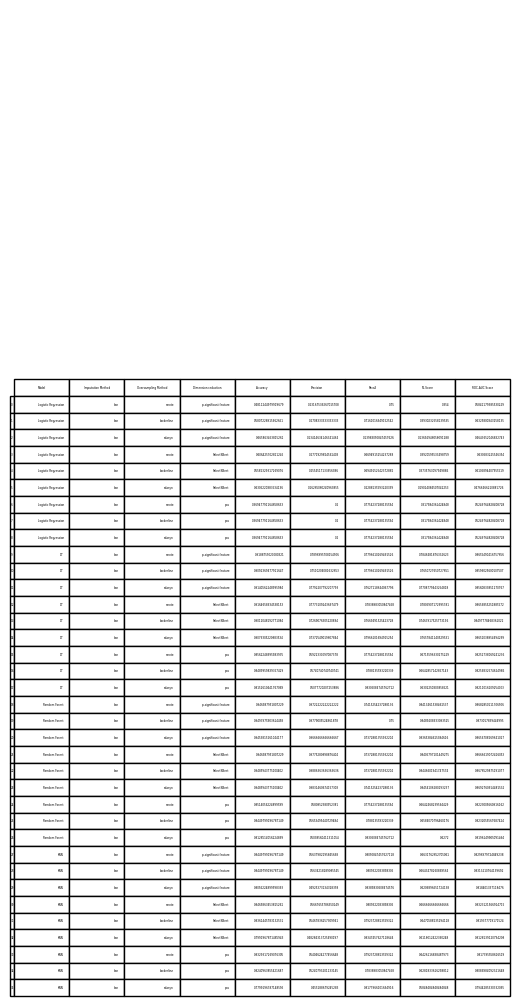